## Початкове завантаження бібліотек та набору даних

In [1]:
# Завантажеємо початкові модулі
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Читаємо весь наявний набір даних
game_sale_data = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

## Попередня перевірка набору дани

In [3]:
# Виведемо початкові дані
game_sale_data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Виведемо прикінцеві дані
game_sale_data.tail()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Перегляд розміру набору даних
game_sale_data.shape

(16719, 16)

In [6]:
# Перевірка повноти набору даних
game_sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [7]:
# З отриманих результатів бачимо, що кількість елементів у стовпцях «Critic_Score» та «Global_Sales» відрізняється. Видалимо рядки, які містять значення NaN
game_sale_data.dropna(inplace=True, subset=["Critic_Score"])

In [8]:
# Повторюєм операцію на перевірку повноти набору даних
game_sale_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8137 entries, 0 to 16709
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8137 non-null   object 
 1   Platform         8137 non-null   object 
 2   Year_of_Release  7983 non-null   float64
 3   Genre            8137 non-null   object 
 4   Publisher        8133 non-null   object 
 5   NA_Sales         8137 non-null   float64
 6   EU_Sales         8137 non-null   float64
 7   JP_Sales         8137 non-null   float64
 8   Other_Sales      8137 non-null   float64
 9   Global_Sales     8137 non-null   float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       8099 non-null   object 
 13  User_Count       7017 non-null   float64
 14  Developer        8131 non-null   object 
 15  Rating           8054 non-null   object 
dtypes: float64(9), object(7)
memory usage: 1.1+ MB


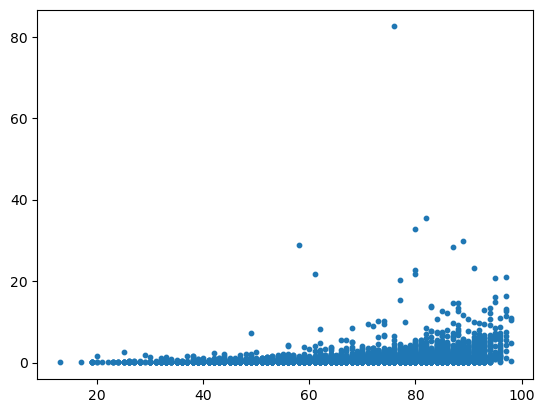

In [9]:
# Роздрукуємо графік тренувального набору даних
plt.scatter(game_sale_data["Critic_Score"], game_sale_data["Global_Sales"], s=10)

In [10]:
# З графіку ми бачимо, що деякі дані сильно відрізняються тому для покращення резульату ми видалио їх
Q1 = game_sale_data['Global_Sales'].quantile(0.25)
Q3 = game_sale_data['Global_Sales'].quantile(0.75)
IQR = Q3 - Q1
# Відфільтруємо рядки, де значення «Global_Sales» знаходяться за межами діапазону 1,5 * IQR
game_sale_data = game_sale_data[(game_sale_data['Global_Sales'] >= Q1 - 1.5 * IQR) & (game_sale_data['Global_Sales'] <= Q3 + 1.5 * IQR)]

In [11]:
# Переформуємо структуру даних game_sale_data
X = game_sale_data["Critic_Score"].values.reshape(-1,1)
Y = game_sale_data["Global_Sales"].values.reshape(-1,1)

In [12]:
# Видимо перші 10 елементів стовпця "Critic_Score"
game_sale_data["Critic_Score"].head(10)

1266    91.0
1267    80.0
1268    81.0
1269    67.0
1270    79.0
1273    75.0
1274    85.0
1276    57.0
1280    60.0
1282    83.0
Name: Critic_Score, dtype: float64

In [13]:
# Видимо перші 10 елементів масиву X для перевірки
X[0:10]

array([[91.],
       [80.],
       [81.],
       [67.],
       [79.],
       [75.],
       [85.],
       [57.],
       [60.],
       [83.]])

## Навчання моделі 

In [14]:
# Імпортуємо train_test_split
from sklearn.model_selection import train_test_split
# Набір даних ділиться на тренувальні дані та дані перехресної перевірки
X_train, X_cv, y_train, y_cv = train_test_split(X, Y, test_size=0.3, random_state=1)

In [15]:
# Імпортуємо LinearRegression
from sklearn.linear_model import LinearRegression
# Навчання моделі лінійної регресії з використанням тренувальних даних
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [16]:
# Щоб перевірити успішність навчання, ми перевіряємо прогноз, використовуючи перші п’ять значень
some_data = X_train[:5]
some_labels = y_train[:5]
print("Predictions: ", lin_reg.predict(some_data))
print("Labels:", some_labels)

Predictions:  [[0.27294505]
 [0.52974843]
 [0.21252073]
 [0.33336938]
 [0.3560285 ]]
Labels: [[0.31]
 [0.05]
 [0.25]
 [0.66]
 [0.04]]


In [17]:
# Перевіримо середньоквадратичну помилку 
from sklearn.metrics import mean_squared_error
predictions = lin_reg.predict(X_train)
mse = mean_squared_error(y_train, predictions)
rmse = np.sqrt(mse)
rmse

0.32839476432578774

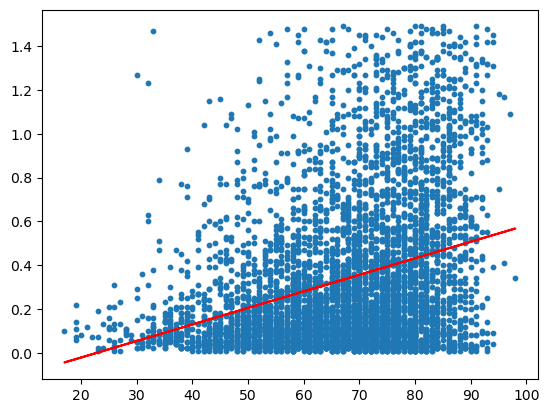

In [18]:
# Відобразимо червоною лінією отримані дані, а розсіяні дані показують результати крос-волідації
plt.scatter(X_train, y_train, s=10)
plt.plot(X_train, predictions, color='red')
plt.show()

In [19]:
# Знайдемо середньоквадратичну помилку на даних крос-волідації
cv_predictions = lin_reg.predict(X_cv)
cv_mse = mean_squared_error(y_cv, cv_predictions)
cv_rmse = np.sqrt(cv_mse)
cv_rmse

0.315757498886563

## Тестування моделі

In [20]:
# Імпортуємо тестовий набір даних https://www.kaggle.com/datasets/kendallgillies/video-game-sales-and-ratings
data_test = pd.read_csv("Video_Game_Sales_as_of_Jan_2017.csv")

In [21]:
# Перевірка повноти набору даних
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17408 non-null  float64
 3   Genre            17416 non-null  object 
 4   Publisher        17415 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
dtypes: float64(10), object(5)
memory usage: 2.0+ MB


In [22]:
# З отриманих результатів бачимо, що кількість елементів у стовпцях «Critic_Score» та «Global_Sales» відрізняється. Видалимо рядки, які містять значення NaN
data_test.dropna(inplace=True, subset=["Critic_Score"])

In [23]:
# Відфільтруємо рядки, де значення «Global_Sales» знаходяться за межами діапазону 1,5 * IQR
Q1 = data_test['Global_Sales'].quantile(0.25)
Q3 = data_test['Global_Sales'].quantile(0.75)
IQR = Q3 - Q1
data_test = data_test[(data_test['Global_Sales'] >= Q1 - 1.5 * IQR) & (data_test['Global_Sales'] <= Q3 + 1.5 * IQR)]

In [24]:
# Переформуємо структуру даних data_test
X_test = data_test["Critic_Score"].values.reshape(-1,1)
y_test = data_test["Global_Sales"].values.reshape(-1,1)

In [25]:
# Визначимо середньоквадратичну помилку при його використанні на даній регресійній моделі
final_predictions = lin_reg.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.32073901713200165

In [26]:
# Перевіряємо r2 score
from sklearn.metrics import r2_score
score=r2_score(y_test, final_predictions)
score

0.08725066060955589

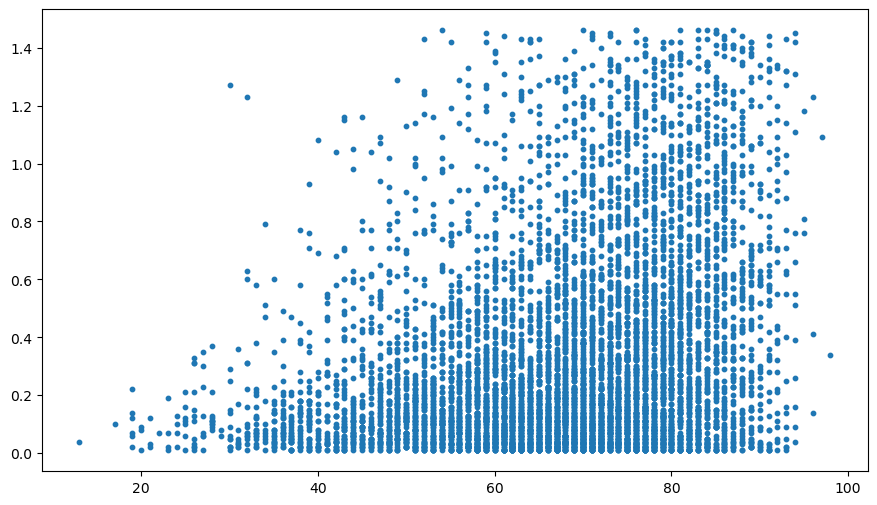

In [27]:
# Дані з тестового набору 
plt.figure(figsize=(10.66, 6))
plt.scatter(data_test["Critic_Score"], data_test["Global_Sales"], s=10)
plt.savefig("raw_data.jpg")

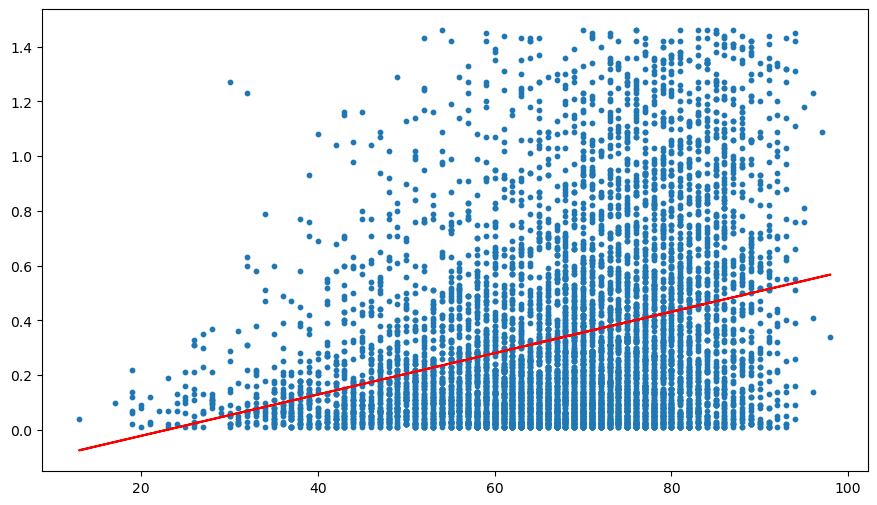

In [28]:
# Результат роботи моделі на тестовому наборі даних
plt.figure(figsize=(10.66, 6))
plt.scatter(data_test["Critic_Score"], data_test["Global_Sales"], s=10)
plt.plot(X_test, final_predictions, color='red')
plt.savefig("final_graph.jpg")